<a href="https://colab.research.google.com/github/soomin-01/colab_test/blob/main/%ED%8C%80_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%84%B1%EB%82%A8%EC%8B%9C_%EB%B2%84%EC%8A%A4%EC%A0%84%EA%B4%91%ED%8C%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##성남시 bit 설치비율


In [ ]:
import matplotlib.pyplot as plt

# 1. Nanum 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
#성남시 bit 설치비율
import pandas as pd

df = pd.read_csv("/content/경기도 성남시_버스정류장_현황_20250417.csv")

df_unique = df.drop_duplicates()

total_count = df_unique.shape[0]
print("성남시 총 정류장 수:", total_count)

no_bit_count = df_unique['버스정보안내단말기(BIT) 유형'].str.contains("미설치", na=False).sum()
print("BIT가 미설치된 정류장 수:", no_bit_count)

no_bit_ratio = (no_bit_count / total_count) * 100
print(f"미설치 비율: {no_bit_ratio:.2f}%")



성남시 총 정류장 수: 1297
BIT가 미설치된 정류장 수: 307
미설치 비율: 23.67%


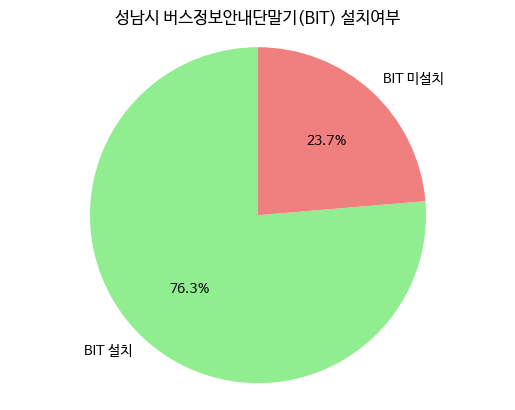

In [ ]:
labels = ["BIT 설치", "BIT 미설치"]
sizes = [total_count - no_bit_count, no_bit_count]

plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title("성남시 버스정보안내단말기(BIT) 설치여부")
plt.axis('equal')
plt.show()

In [ ]:
import folium

# CSV 파일 불러오기
df = pd.read_csv("/content/경기도 성남시_버스정류장_현황_20250417.csv")
df = df.drop_duplicates()

# 위도/경도 결측치 제거
df = df.dropna(subset=['위도', '경도'])

# 위도/경도 데이터 타입 정리
df['위도'] = pd.to_numeric(df['위도'], errors='coerce')
df['경도'] = pd.to_numeric(df['경도'], errors='coerce')
df = df.dropna(subset=['위도', '경도'])

# BIT 설치 여부를 '설치' vs '미설치'로 통일
df['BIT설치여부'] = df['버스정보안내단말기(BIT) 유형'].apply(
    lambda x: '미설치' if pd.notnull(x) and '미설치' in x else '설치'
)

# 지도 생성 (성남시 중심)
map_center = [37.4202, 127.1265]
m = folium.Map(location=map_center, zoom_start=12)

# 마커 색상 설정 및 지도에 추가
for _, row in df.iterrows():
    lat = row['위도']
    lon = row['경도']
    name = row['정류장명']
    status = row['BIT설치여부']

    # 상태에 따라 마커 색 설정
    color = 'red' if status == '미설치' else 'green'

    # 마커 추가
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        popup=f"{name} ({status})",
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(m)

m

In [ ]:
# '행정구'와 '버스정보안내단말기(BIT) 유형' 컬럼만 선택하고 해당 컬럼에 결측치가 없는 행만 사용
df_filtered = df[['행정구', '버스정보안내단말기(BIT) 유형']].dropna(subset=['행정구', '버스정보안내단말기(BIT) 유형'])

# '버스정보안내단말기(BIT) 유형' 컬럼에서 '미설치'를 포함하는 행만 필터링
df_no_bit = df_filtered[df_filtered['버스정보안내단말기(BIT) 유형'].str.contains('미설치', na=False)]

# '행정구' 컬럼을 기준으로 그룹화하고 각 그룹의 크기(개수) 계산
no_bit_count_by_district = df_no_bit.groupby('행정구').size()

# 결과 출력
print("행정구별 BIT 미설치 정류소 개수:")
print(no_bit_count_by_district)

행정구별 BIT 미설치 정류소 개수:
행정구
분당구    132
수정구     62
중원구    113
dtype: int64


분당구와 중원구 미설치 정류장 132 + 113 = 245에 대한 비율 가중치 적용

분당구 상위 10개 동에 177×132/245 = 95개 설치
중원구 전체 11개 동에 177x113/245 = 82개 설치

##경기도 성남시_노년층 인구 및 세대 수

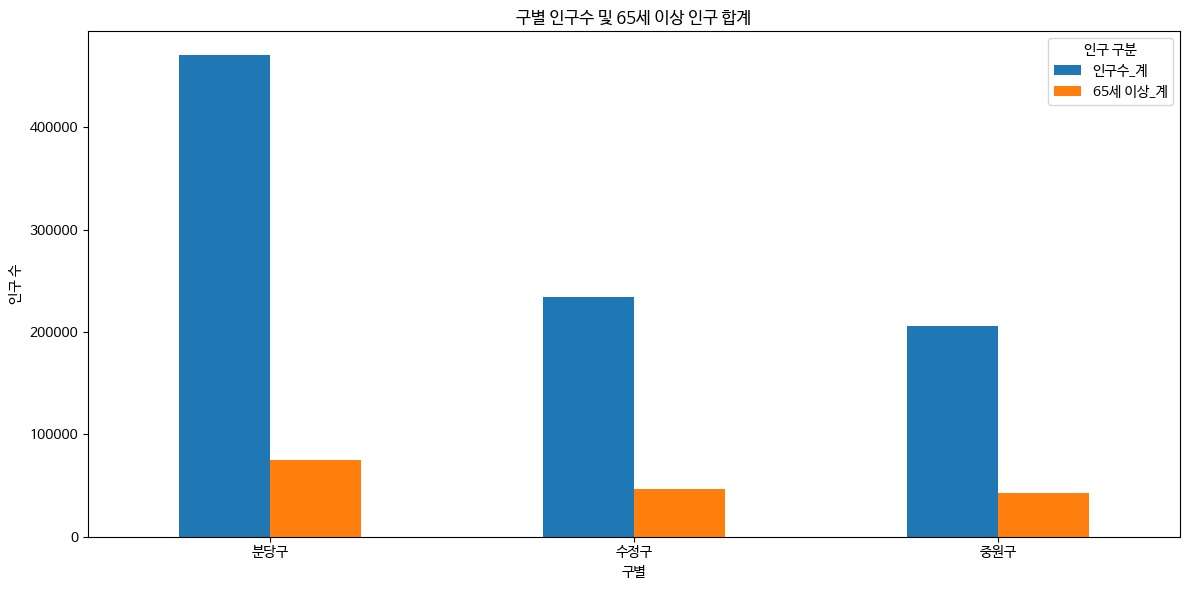

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Seoungnam_Elderly_data = pd.read_csv("/content/경기도 성남시_노년층 인구 및 세대 수.csv")

df=pd.DataFrame(Seoungnam_Elderly_data)

# '세대수' 컬럼 삭제
df = df.drop('세대수', axis=1)

# '구별'로 그룹화하고 '인구수_계', '65세 이상_계' 컬럼의 합계 계산
grouped_by_district_sum_specific = df.groupby('구별')[['인구수_계', '65세 이상_계']].sum()

# 막대 그래프 시각화
grouped_by_district_sum_specific.plot(kind='bar', figsize=(12, 6))

# 그래프 제목 및 축 라벨 설정
plt.title('구별 인구수 및 65세 이상 인구 합계')
plt.xlabel('구별')
plt.ylabel('인구 수')
plt.xticks(rotation=0) # x축 레이블 회전 방지 (구 이름이 짧으므로 0도로 설정)
plt.legend(title='인구 구분') # 범례 제목 설정
plt.tight_layout() # 그래프 레이아웃 자동 조정
plt.show()

##결과1

In [ ]:
# '구별'이 '중원구'인 행만 선택
df_jungwon = df[df['구별'] == '중원구']

# 선택된 데이터를 '65세 이상 비율'로 내림차순 정렬
df_jungwon_sorted = df_jungwon.sort_values(by='65세 이상 비율', ascending=False)

df_jungwon_sorted

,구별,동,인구수_계,65세 이상_계,65세 이상 비율,비고
25,중원구,상대원3동,11257,2841,25%,초고령
22,중원구,은행2동,21303,5129,24%,초고령
24,중원구,상대원2동,2982,704,24%,초고령
20,중원구,금광2동,23989,5249,22%,초고령
23,중원구,상대원1동,23468,5214,22%,초고령
17,중원구,성남동,32148,6873,21%,초고령
26,중원구,하대원동,19280,4043,21%,초고령
21,중원구,은행1동,9381,1843,20%,초고령
18,중원구,중앙동,16657,3145,19%,고령
27,중원구,도촌동,25974,4512,17%,고령


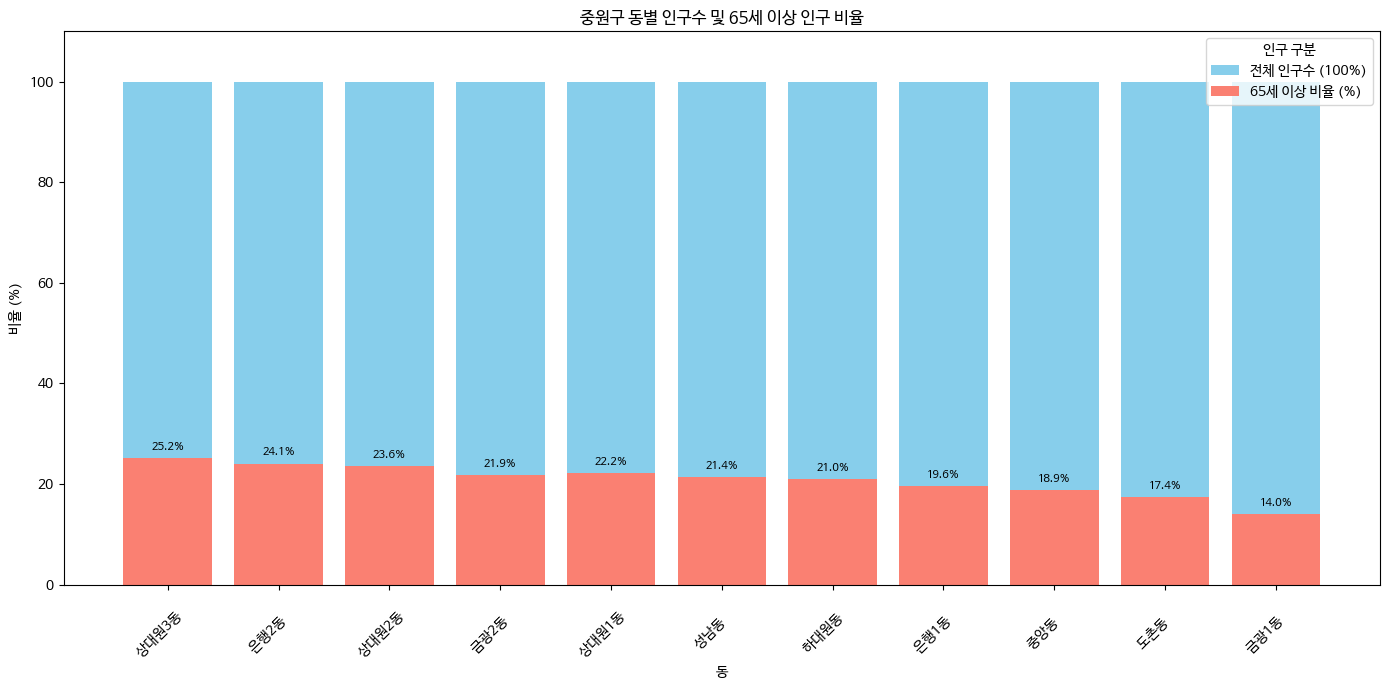

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# df_jungwon_sorted 데이터프레임 사용
df_jungwon_all = df_jungwon_sorted.copy() # 원본 변경 방지를 위해 복사본 사용

# 인구수_계와 65세 이상_계의 비율 계산
df_jungwon_all['인구수_비율'] = 100  # 전체 인구수는 100%
df_jungwon_all['65세 이상_비율'] = (df_jungwon_all['65세 이상_계'] / df_jungwon_all['인구수_계']) * 100

# 그래프 그리기
fig, ax = plt.subplots(figsize=(14, 7)) # 그래프 크기 조정 (동 개수에 따라 필요 시 더 크게 설정)

# 누적 막대 그래프 그리기
# '인구수_비율' (전체 100%)
bar1 = ax.bar(df_jungwon_all['동'], df_jungwon_all['인구수_비율'], color='skyblue', label='전체 인구수 (100%)')

# '65세 이상_비율'
bar2 = ax.bar(df_jungwon_all['동'], df_jungwon_all['65세 이상_비율'], color='salmon', label='65세 이상 비율 (%)')

# 65세 이상 비율 값 표시
for bar, rate in zip(bar2, df_jungwon_all['65세 이상_비율']):
    yval = bar.get_height()
    # 텍스트 표시 위치 조정 (동 개수에 따라 겹칠 수 있으므로 필요 시 조정)
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{rate:.1f}%', ha='center', va='bottom', fontsize=8) # 폰트 크기 줄임

# 그래프 제목 및 축 라벨 설정
ax.set_title('중원구 동별 인구수 및 65세 이상 인구 비율')
ax.set_xlabel('동')
ax.set_ylabel('비율 (%)')
ax.set_xticks(df_jungwon_all['동']) # x축 레이블 설정
ax.tick_params(axis='x', rotation=45) # x축 레이블 회전
ax.legend(title='인구 구분') # 범례 제목 설정
ax.set_ylim(0, 110) # y축 범위 설정 (텍스트 표시 공간 확보)

plt.tight_layout() # 그래프 레이아웃 자동 조정
plt.show()

In [ ]:
# '구별'이 '분당구'인 행만 선택
df_bundang = df[df['구별'] == '분당구']

# 선택된 데이터를 '65세 이상_계'로 내림차순 정렬
df_bundang_sorted = df_bundang.sort_values(by='65세 이상 비율', ascending=False)

print(df_bundang_sorted)

     구별              동  인구수_계  65세 이상_계 65세 이상 비율   비고
41  분당구  야탑2동           15616      3422       22%  초고령
44  분당구            구미동  28057      5950       21%  초고령
43  분당구            금곡동  26904      5582       21%  초고령
40  분당구  야탑1동           16612      3322       20%  초고령
42  분당구  야탑3동           26130      5273       20%  초고령
34  분당구  정자2동           14280      2803       20%  초고령
39  분당구  이매2동           12941      2411       19%   고령
45  분당구           구미1동  16195      2735       17%   고령
28  분당구  분당동            24399      4157       17%   고령
32  분당구  정자동            13877      2320       17%   고령
37  분당구  서현2동           17440      2725       16%   고령
38  분당구  이매1동           24675      3859       16%   고령
35  분당구  정자3동           16597      2469       15%   고령
48  분당구  백현동            26398      3972       15%   고령
29  분당구  수내1동           17825      2553       14%   고령
36  분당구  서현1동           30682      4423       14%   고령
33  분당구  정자1동           30161      4299       14%   고령
47  분당구  삼

In [ ]:
# df_bundang_sorted에서 상위 10개 행 출력
print(df_bundang_sorted.head(10))

     구별              동  인구수_계  65세 이상_계 65세 이상 비율   비고
41  분당구  야탑2동           15616      3422       22%  초고령
44  분당구            구미동  28057      5950       21%  초고령
43  분당구            금곡동  26904      5582       21%  초고령
40  분당구  야탑1동           16612      3322       20%  초고령
42  분당구  야탑3동           26130      5273       20%  초고령
34  분당구  정자2동           14280      2803       20%  초고령
39  분당구  이매2동           12941      2411       19%   고령
45  분당구           구미1동  16195      2735       17%   고령
28  분당구  분당동            24399      4157       17%   고령
32  분당구  정자동            13877      2320       17%   고령


In [ ]:
# '구별'이 '분당구'인 행만 선택
df_bundang = df[df['구별'] == '분당구']

# 선택된 데이터를 '65세 이상_계'로 내림차순 정렬
df_bundang_sorted = df_bundang.sort_values(by='65세 이상 비율', ascending=False)


df_bundang_sorted.head(10)

,구별,동,인구수_계,65세 이상_계,65세 이상 비율,비고
41,분당구,야탑2동,15616,3422,22%,초고령
44,분당구,구미동,28057,5950,21%,초고령
43,분당구,금곡동,26904,5582,21%,초고령
40,분당구,야탑1동,16612,3322,20%,초고령
42,분당구,야탑3동,26130,5273,20%,초고령
34,분당구,정자2동,14280,2803,20%,초고령
39,분당구,이매2동,12941,2411,19%,고령
45,분당구,구미1동,16195,2735,17%,고령
28,분당구,분당동,24399,4157,17%,고령
32,분당구,정자동,13877,2320,17%,고령


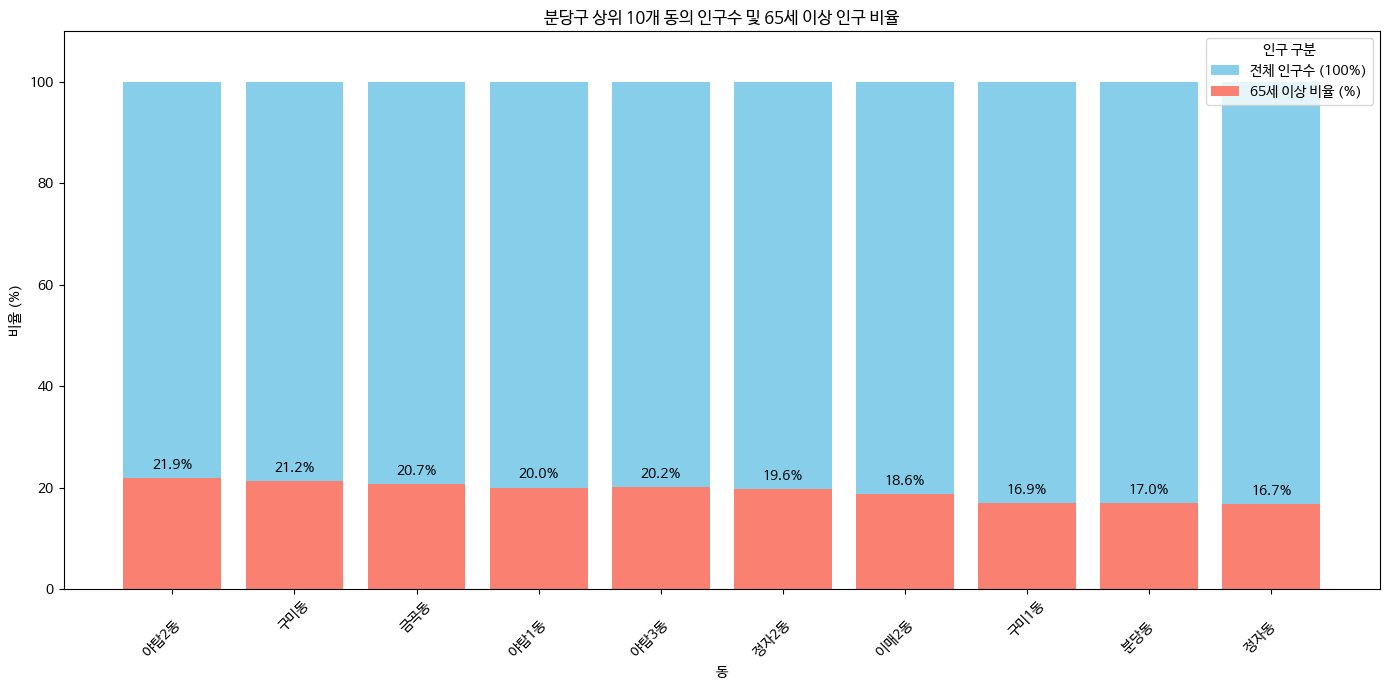

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 이미 준비된 df_bundang_sorted.head(10) 데이터프레임 사용
df_bundang_top10 = df_bundang_sorted.head(10).copy() # 원본 변경 방지를 위해 복사본 사용

# 인구수_계와 65세 이상_계의 비율 계산
df_bundang_top10['인구수_비율'] = 100  # 전체 인구수는 100%
df_bundang_top10['65세 이상_비율'] = (df_bundang_top10['65세 이상_계'] / df_bundang_top10['인구수_계']) * 100

# 그래프 그리기
fig, ax = plt.subplots(figsize=(14, 7))

# 누적 막대 그래프 그리기
# '인구수_비율' (전체 100%)
bar1 = ax.bar(df_bundang_top10['동'], df_bundang_top10['인구수_비율'], color='skyblue', label='전체 인구수 (100%)')

# '65세 이상_비율'
bar2 = ax.bar(df_bundang_top10['동'], df_bundang_top10['65세 이상_비율'], color='salmon', label='65세 이상 비율 (%)')

# 65세 이상 비율 값 표시
for bar, rate in zip(bar2, df_bundang_top10['65세 이상_비율']):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{rate:.1f}%', ha='center', va='bottom') # 막대 상단에 텍스트 표시

# 그래프 제목 및 축 라벨 설정
ax.set_title('분당구 상위 10개 동의 인구수 및 65세 이상 인구 비율')
ax.set_xlabel('동')
ax.set_ylabel('비율 (%)')
ax.set_xticks(df_bundang_top10['동']) # x축 레이블 설정
ax.tick_params(axis='x', rotation=45) # x축 레이블 회전
ax.legend(title='인구 구분') # 범례 제목 설정
ax.set_ylim(0, 110) # y축 범위 설정 (텍스트 표시 공간 확보)

plt.tight_layout() # 그래프 레이아웃 자동 조정
plt.show()

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/경기도 성남시_버스정류장_현황_20250417.csv")
df = df.dropna(subset=["위도", "경도"])
df["위도"] = df["위도"].astype(float)
df["경도"] = df["경도"].astype(float)

np.random.seed(42)
df["혼잡도지수"] = np.random.randint(1, 11, len(df))
df["고령자비율"] = np.random.uniform(0.1, 0.5, len(df))
df["1월평균기온"] = np.random.uniform(-5, 5, len(df))

df["온열조건"] = (df["고령자비율"] > 0.3) & (df["1월평균기온"] < 0)
df["바람조건"] = (df["1월평균기온"] < 2) & (df["혼잡도지수"] >= 7)
df["온열설치여부"] = df["의자설치유형"] == "온열의자"
df["바람설치여부"] = df["바람막이설치여부"] == "설치"

def 마커속성(row):
    if row["온열조건"] and row["바람조건"]:
        if not row["온열설치여부"] and not row["바람설치여부"]:
            return ("black", "star", "온열+바람 둘 다 설치 필요")
        else:
            return ("green", "check", "온열+바람 최소 1개 설치됨")
    elif row["온열조건"]:
        if not row["온열설치여부"]:
            return ("red", "fire", "온열의자 설치 필요")
        else:
            return ("green", "check", "온열의자 설치됨")
    elif row["바람조건"]:
        if not row["바람설치여부"]:
            return ("blue", "flag", "바람막이 설치 필요")
        else:
            return ("green", "check", "바람막이 설치됨")
    else:
        return (None, None, None)

import folium

m = folium.Map(location=[df["위도"].mean(), df["경도"].mean()], zoom_start=12)

for _, row in df.iterrows():
    color, icon, label = 마커속성(row)
    if color:
        folium.Marker(
            location=[row["위도"], row["경도"]],
            popup=f"{label} - {row['정류장명']}",
            icon=folium.Icon(color=color, icon=icon, prefix='fa')
        ).add_to(m)

m